# Data Cycle Example

This is just a start into the date cylce.

Methods will be discussed in the next lectues, but keep in mind that data analysis requires also some level of domain knowledge. Coincidentially, there is one kind of data on which we are all experts by now.

Download the file 20220218covid19infectionsurveydatasetsscotland.xlsx from Learn and remember in which directory you've put it. 


## Data Acquisition

Data Acquisition means measureing, counting, observing, recording,  stroring etc.

Including documenting and critically reviewing any interference, confounds, biasses etc.

Here the dataset is already existant: Check the following
* Provenance: No data is perfect. Is the data trustworthy? 
* Quality: 
* Conditions
* Ranges

Can you open the data file, e.g. with libreoffice?

## Data Preparation

Our data are contained in an Excel file. We have to move them to Python.

In this case, you would simply search for "excel to python", which will tell you that the earlier mention pandas libnarary conveniently provides a function **read_excel** that will do the job.

You will need to add the correct path (unless the data are in the same directory as the notebook).

The excel file contains several sheets as you may have noticed. We will use the sheet **UK summary - positivity**.

In [1]:
import pandas as pd
df = pd.read_excel(r'../data/20220218covid19infectionsurveydatasetsscotland.xlsx', sheet_name='UK summary - positivity')
#print (df)        # This prints all data on the sheet, you can put a comment in front, not to do this each time 

The expression "NaN" tells us that the content is **Not a Number**, which is perhaps due to speacial charactes used to draw the table.

## Data Extraction

Choose data format
Select relevant columns

In [2]:
df

,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,UK summary - positivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Official reported estimates of the percentage ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27 April 2020 to 13 February 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,NaN,NaN,NaN,NaN,Wales,NaN,NaN,NaN,NaN,Northern Ireland,NaN,NaN,NaN,NaN,Scotland,NaN,NaN,NaN,NaN
4,Time period,Estimated average % of the population that had...,95% Lower confidence/credible interval,95% Upper confidence/credible interval,Method,Time period,Estimated average % of the population that had...,95% Lower credible interval,95% Upper credible interval,Method,Time period,Estimated average % of the population that had...,95% Lower confidence/credible interval,95% Upper confidence/credible interval,Method,Time period,Estimated average % of the population that had...,95% Lower confidence/credible interval,95% Upper confidence/credible interval,Method
5,27 April 2020 to 10 May 2020,0.27,0.17,0.41,14-day weighted estimates,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
6,04 May 2020 to 17 May 2020,0.25,0.16,0.38,14-day weighted estimates,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
7,11 May 2020 to 24 May 2020,0.24,0.11,0.46,14-day weighted estimates,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
8,17 May 2020 to 30 May 2020,0.1,0.05,0.18,14-day weighted estimates,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
9,25 May 2020 to 07 June 2020,0.06,0.02,0.12,14-day weighted estimates,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


* The column titles that we see in row 4 were not recognised, instead dummy titles are inserted before row 0.
* The row numbers in this representation differ from the rows in excel (excel counts from 1, python starts usually at zero, but here actually at -1)
* The relevant data are in rows 5 through 98 in the dataframe.
* For a start, we may look in rows 1, 6, 11 and 16 which contain the averages for England, Wales, Northern Ireland and Scotland. 
* We should also keep the time period in column 0. Note, however, that the corresponding time periods in columns 5, 10 and 15 are not exactly the same (possibly due delay in reporting due to the local holidays in the UK)

For this purpose, we can use the function `iloc` (*integer location*) which works with numbers for lines and columns (There is also `loc` works with titles which we would need to recreate).

Let's have a look at data column 1.

In [3]:
p0=df.iloc[5:99,1].plot()         # choose second column (counting from 0) and plot the values from row 5 to 98
                                  # p0 has no funciton here except suppressing any text output 

If we try this for Wales, Northern Ireland, or Scotland, we get an error message. If we enter the starting row for Scotland (which is the last country in the UK to publish their COVID-19 averages), we can plot all four traces together.

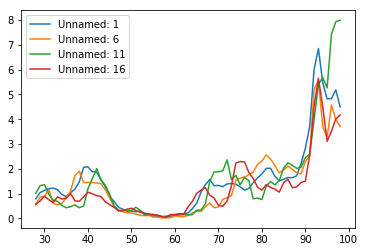

In [4]:
p0=df.iloc[28:99, [1,6,11,16]].plot()    

As in the previoius notebook, we should add a bit more information to the plot.

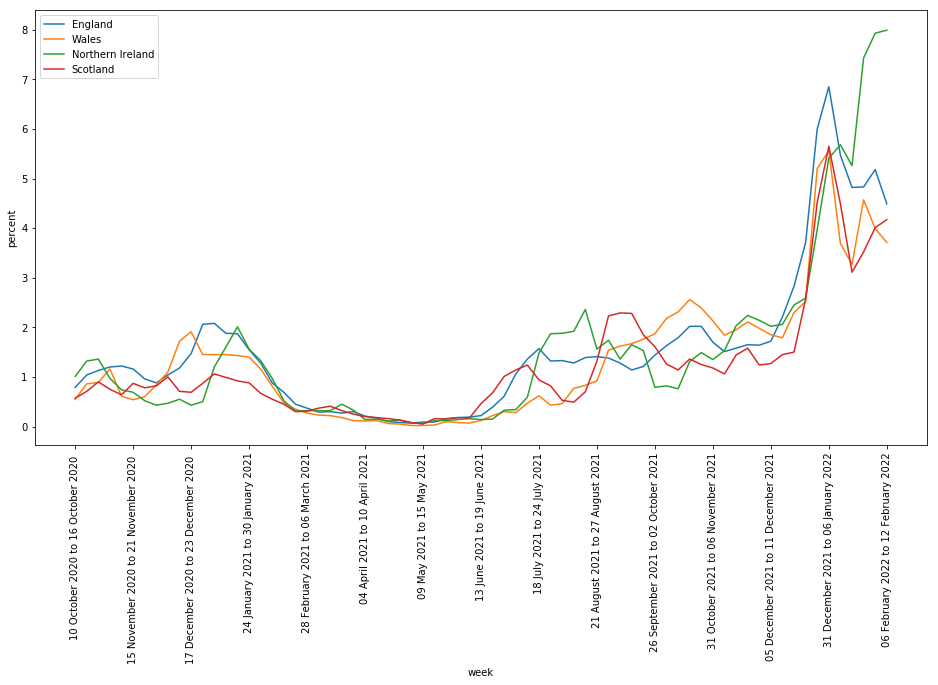

In [5]:
import matplotlib.pyplot as plt                     # was not yet needed 
c = df.iloc[28:99, [0,1,6,11,16]]
c.columns=['week','England','Wales','Northern Ireland','Scotland']
pp=c.plot(figsize=(16, 8))                          # figure should be a bit bigger than usual to show all labels
p0=pp.set_ylabel("percent")                         # p0 has no funciton here except avoiding text output 
p0=pp.set_xlabel("week")
#p0=pp.set_xticks(c.index)                          # If uncommented, this would show all x ticks
n=5
p0=pp.set_xticks(c.index[::n])                      # only every n-th xtick is shown, n is also used in the last line
#p0=pp.set_xticklabels(c.week, rotation=90)         # This would show all labels
p0=pp.set_xticklabels(c.week[::n], rotation=90)     # The labels are too long for a horizontal print 

Whether this plot is good enough is to be decided by the standards in the field, by customers, supervisors, or data providors.

We could try to shorten the xticklabels. We cut some parts from the strings and paste the result together.

In [6]:
ww='30 January 2022 to 05 February 2022'
print(" ".join(ww.split()[:3]))

30 January 2022


The x-label should then read 'week beginning on' or similar.

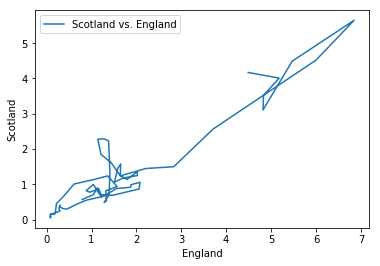

In [7]:
pp=c.plot(x='England', y='Scotland', label='Scotland vs. England')
p0=pp.set_ylabel("Scotland")                         # p0 has no funciton here except avoiding text output 
p0=pp.set_xlabel("England")

The data between Scotland and Englang are quite aligned, although Scotland seems to have a somewhat lower incidence. There is one escape from a perfect correlation, is this because of a difference in policy between the two countries?

We should also have a look at the confidence intervals that are included in the data.

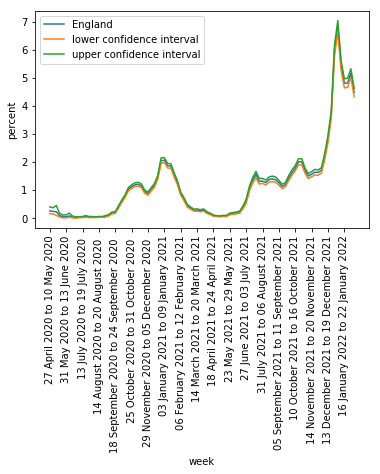

In [8]:
c = df.iloc[5:99, [0,1,2,3]]
c.columns=['week','England','lower confidence interval','upper confidence interval']
pp=c.plot()                          # figure should be a bit bigger than usual to show all labels
p0=pp.set_ylabel("percent")                         # p0 has no funciton here except avoiding text output 
p0=pp.set_xlabel("week")
n=5
p0=pp.set_xticks(c.index[::n])                      # only every n-th xtick is shown, n is also used in the last line
p0=pp.set_xticklabels(c.week[::n], rotation=90)     # The labels are too long for a horizontal print 

The data seem quite concentrated around the average. Interesting is perhaps that the confidence interval was a bit large in the first weeks. Later a different model was adapted. It is useful that the data file indicates this.

## Data Modelling

Data modelling aims at specifying a focus relying on tools that you will learn about in the next lectures. 

The main roles of the models is comparison: How much of the data we can understand by the model.

## Data Evaluation

* What did we learn from the data? 
* What kinds of discussions are useful. 
* What addition tests should be performed to provide more evidence, to find out more about the data, to test the model etc.
* We should go through the cycle in reversed order to get an understanding how much out work could have affected the data. 
* What structure in the data has not been considered?